## USP - EACH - SIN5007 - Reconhecimento de Padrões - 1º SEM 2020

## Classificação de Modelos cardíacos tridimensionais relacionada à presença ou ausência de cardimiopatia


**Grupo H(8):** <br />
Diego Dedize <br />
Luiz Gustavo Silva <br />
Vagner Mendonça Gonçalves <br />

version 0.2 - 16/04/2020

**Objetivo:** aplicar modelos de classificação  e avaliar os resultados obtidos em um dataset composto por vetores de características extraídas de modelos 3D reconstruídos a partir de exames de Ressonancia Magnética Cardíaca (RMC).

**Cardiomiopatia:** quadro clínico dado por uma anormalidade no miocárdio (estrutura muscular do coração) (KUMAR et al., 2010 apud BERGAMASCO, 2018).

**Fonte dos dados:** Dataset disponibilizado pelo Laboratório de Aplicações de Informática em Saúde (LApIS) - EACH/USP, coordenado pela Profa. Dra. Fátima L. S. Nunes.

**Referências:** <br />
BERGAMASCO, Leila Cristina Carneiro. Recuperação de imagens cardíacas tridimensionais por conteúdo. 2013. 134 f. Dissertação (Mestrado em Ciências) - Programa de Pós-graduação em Sistemas de Informação, Escola de Artes, Ciências e Humanidades, Universidade de São Paulo, São Paulo, 2013. 

BERGAMASCO, Leila Cristina Carneiro. Recuperação de objetos médicos 3D utilizando harmônicos esféricos e redes de fluxo. 2018. 181 f. Tese (Doutorado em Ciências) - Escola Politécnica, Departamento de Engenharia da Computação e Sistemas Digitais, Universidade de São Paulo, São Paulo, 2018.

KUMAR, V.; ABBAS, A. K.; FAUSTO, N.; ASTER, J. C.. Robbins & Cotran – Patologia: Bases Patológicas das Doenças. 8 ed. Rio de Janeiro: Elsevier, 2010.


# Importanto bibliotecas importantes

In [153]:
%matplotlib inline
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

warnings.simplefilter(action='ignore', category=FutureWarning)

# Importando arquivos

In [2]:
### Arquivos: Pacientes
df_pac = pd.read_csv("../ARQUIVOS_FINAIS/Dados_Paciente/Pacientes_20200414.csv",header=None)
colunas = ['id','age','masculino','class_id']

df_pac.columns = colunas
df_pac.head(3)


###Arquivo: Volume Massa
df_vol = pd.read_csv("../ARQUIVOS_FINAIS/Volume/Volume_20200414.csv",header=None)
colunas = ['id','volume','massa']


df_vol.columns = colunas
df_vol.head(3)

###Junta informações paciente
df_pac = pd.merge(df_pac,df_vol,on=['id'])
df_pac.head(3)

,id,age,masculino,class_id,volume,massa
0,id001,29,1,0,74,110
1,id002,31,1,0,94,126
2,id003,27,1,0,92,157


## Carregando arquivos Soma SPHARM

In [3]:
df_endo = pd.read_csv("../ARQUIVOS_FINAIS/SPHARMs/SomaEndoSPHARM_01_20200412_L10.txt",header=None)
colunas = ['id','soma_endo']
df_endo.columns = colunas
df_endo.head(3)


df_epi = pd.read_csv("../ARQUIVOS_FINAIS/SPHARMs/SomaEpiSPHARM_01_20200412_L10.txt",header=None)
colunas = ['id','soma_epi']
df_epi.columns = colunas
df_epi.head(3)


df_parede = pd.read_csv("../ARQUIVOS_FINAIS/SPHARMs/SomaParedeSPHARM_01_20200412_L10.txt",header=None)
colunas = ['id','soma_parede']
df_parede.columns = colunas
df_parede.head(3)


df_total = pd.merge(df_endo,df_epi,on=['id'])
df_total_soma = pd.merge(df_total,df_parede,on=['id'])
df_total_soma.head(3)

,id,soma_endo,soma_epi,soma_parede
0,id001,-3.809996e+06,-2.304811e+06,-1.769105e+06
1,id002,1.973591e+05,1.108307e+05,2.451851e+05
2,id003,-3.196860e+00,8.881557e+06,-1.306913e+06


In [4]:
### Junta todos os datasets 
df_pac = pd.merge(df_pac,df_total_soma,on=['id'])
df_pac.head(3)

,id,age,masculino,class_id,volume,massa,soma_endo,soma_epi,soma_parede
0,id001,29,1,0,74,110,-3.809996e+06,-2.304811e+06,-1.769105e+06
1,id002,31,1,0,94,126,1.973591e+05,1.108307e+05,2.451851e+05
2,id003,27,1,0,92,157,-3.196860e+00,8.881557e+06,-1.306913e+06


## Carregando arquivos EDL

In [5]:
#Importa arquivo de ELD - Endocardio
df_edl_endo = pd.read_csv("../ARQUIVOS_FINAIS/EDL/EDLEndo_20200414.txt",header=None)
coluna_1 = ['id']


#Faz loop para nomear coluna de atributos
coluna_2 = []
for i in range(1,9):
     coluna_2.append('edl_endo_' + str(i))

colunas = coluna_1 + coluna_2
df_edl_endo.columns = colunas
#df_edl_endo.head(3)



#Importa arquivo de ELD - Epicardio
df_epi_endo = pd.read_csv("../ARQUIVOS_FINAIS/EDL/EDLEpi_20200414.txt",header=None)
coluna_1 = ['id']


#Faz loop para nomear coluna de atributos
coluna_2 = []
for i in range(1,9):
     coluna_2.append('edl_epi_' + str(i))

colunas = coluna_1 + coluna_2
df_epi_endo.columns = colunas
df_epi_endo.head(3)


#Importa arquivo de ELD - Parede Ventricular
df_epi_par = pd.read_csv("../ARQUIVOS_FINAIS/EDL/EDLTotal_20200414.txt",header=None)
coluna_1 = ['id']


#Faz loop para nomear coluna de atributos
coluna_2 = []
for i in range(1,9):
     coluna_2.append('edl_par_' + str(i))

colunas = coluna_1 + coluna_2
df_epi_par.columns = colunas
df_epi_par.head(3)


#Junta todos os parametros de EDL
df_total_edl = pd.merge(df_edl_endo,df_epi_endo,on=['id'])
df_total_edl = pd.merge(df_total_edl,df_epi_par,on=['id'])
df_total_edl.head(3)

,id,edl_endo_1,edl_endo_2,edl_endo_3,edl_endo_4,edl_endo_5,edl_endo_6,edl_endo_7,edl_endo_8,edl_epi_1,...,edl_epi_7,edl_epi_8,edl_par_1,edl_par_2,edl_par_3,edl_par_4,edl_par_5,edl_par_6,edl_par_7,edl_par_8
0,id001,0.0,0.0,21.6,0.0,15.9,0.0,168.1,0.0,1.7,...,242.6,0.0,0.8,0.0,58.5,0.0,52.3,0.0,357.6,0.0
1,id002,16.1,0.0,133.0,0.0,0.0,0.0,0.0,0.0,40.0,...,0.0,0.0,48.0,0.0,284.0,0.0,0.0,0.0,0.0,0.0
2,id003,33.4,0.0,84.4,0.0,0.0,0.0,44.5,0.0,47.9,...,67.0,0.0,71.4,0.0,177.2,0.0,6.2,0.0,95.2,0.0


In [6]:
### Junta todos os datasets 
df_pac = pd.merge(df_pac,df_total_edl,on=['id'])
df_pac.head(3)

,id,age,masculino,class_id,volume,massa,soma_endo,soma_epi,soma_parede,edl_endo_1,...,edl_epi_7,edl_epi_8,edl_par_1,edl_par_2,edl_par_3,edl_par_4,edl_par_5,edl_par_6,edl_par_7,edl_par_8
0,id001,29,1,0,74,110,-3.809996e+06,-2.304811e+06,-1.769105e+06,0.0,...,242.6,0.0,0.8,0.0,58.5,0.0,52.3,0.0,357.6,0.0
1,id002,31,1,0,94,126,1.973591e+05,1.108307e+05,2.451851e+05,16.1,...,0.0,0.0,48.0,0.0,284.0,0.0,0.0,0.0,0.0,0.0
2,id003,27,1,0,92,157,-3.196860e+00,8.881557e+06,-1.306913e+06,33.4,...,67.0,0.0,71.4,0.0,177.2,0.0,6.2,0.0,95.2,0.0


In [7]:
df_pac.shape

(400, 33)

In [8]:
df_pac.columns

Index(['id', 'age', 'masculino', 'class_id', 'volume', 'massa', 'soma_endo',
       'soma_epi', 'soma_parede', 'edl_endo_1', 'edl_endo_2', 'edl_endo_3',
       'edl_endo_4', 'edl_endo_5', 'edl_endo_6', 'edl_endo_7', 'edl_endo_8',
       'edl_epi_1', 'edl_epi_2', 'edl_epi_3', 'edl_epi_4', 'edl_epi_5',
       'edl_epi_6', 'edl_epi_7', 'edl_epi_8', 'edl_par_1', 'edl_par_2',
       'edl_par_3', 'edl_par_4', 'edl_par_5', 'edl_par_6', 'edl_par_7',
       'edl_par_8'],
      dtype='object')

### Verifica missings

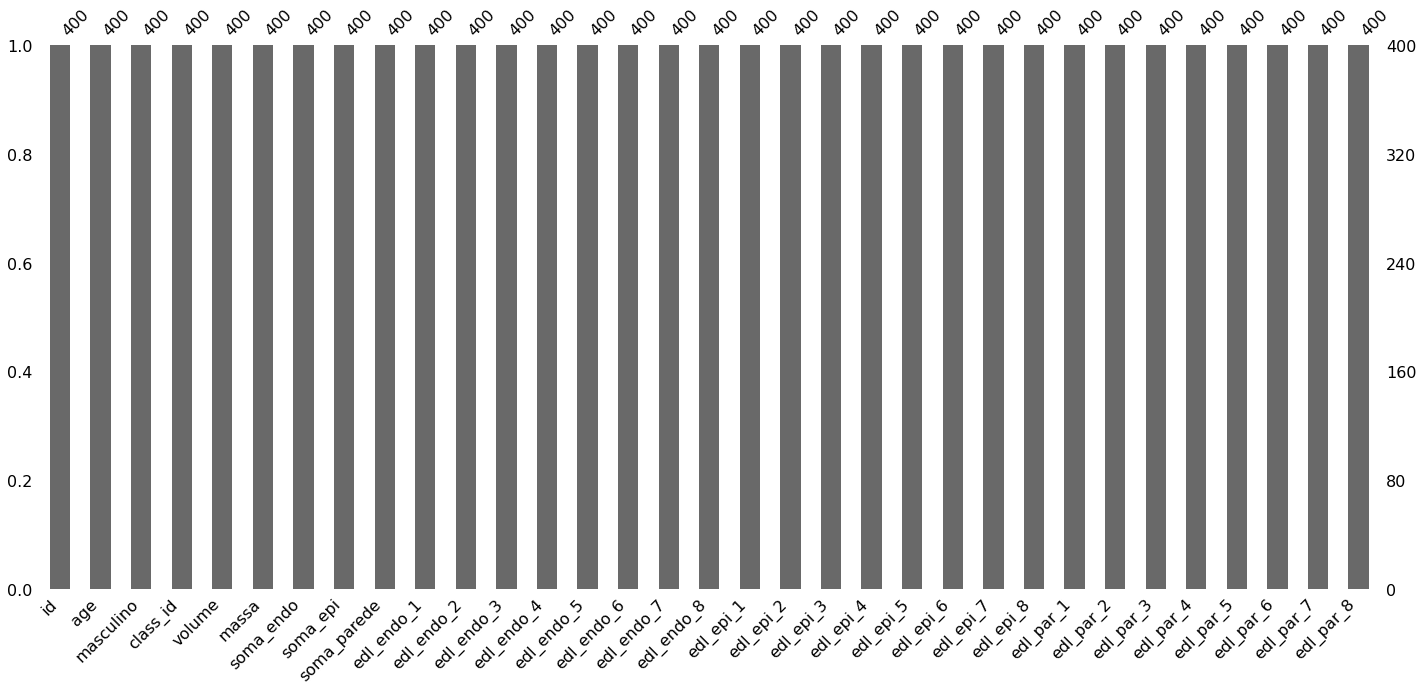

In [9]:
#Todas as variaveis estão preenchidas
#df_pac.isnull().sum()
msno.bar(df_pac)

In [415]:
# É possivel notar que em muitas colunas temos apenas 1 observação preenchida
dados_vazios = (df_pac.isnull().sum()/len(df_pac['id']))*100
#dados_vazios

### Neste ponto traduzimos as classes de acordo com os parametros indicados na apresentação 1
Registros de 1 a 101 a classe é NORMAL <br />
Registros de 102 a 218 a classe é CARDIMIOPATIA DILATADA <br />
Registros de 219 a 401 a classe é  CARTIDIOPATIA HIPERTRÓFICA <br />

In [11]:
for ind, row in df_pac.iterrows():
    if (df_pac.loc[ind,'class_id']==0): df_pac.loc[ind,'class_desc'] = 'normal'
    if (df_pac.loc[ind,'class_id']==1): df_pac.loc[ind,'class_desc'] = 'CMH'
    if (df_pac.loc[ind,'class_id']==2): df_pac.loc[ind,'class_desc'] = 'CMD'

#Verifica a quantidade de cada classe
df_pac['class_desc'].value_counts()

CMH       183
CMD       116
normal    101
Name: class_desc, dtype: int64

# Pré-processamento

In [12]:
#df_pac.dtypes
df_pac.head(3)

,id,age,masculino,class_id,volume,massa,soma_endo,soma_epi,soma_parede,edl_endo_1,...,edl_epi_8,edl_par_1,edl_par_2,edl_par_3,edl_par_4,edl_par_5,edl_par_6,edl_par_7,edl_par_8,class_desc
0,id001,29,1,0,74,110,-3.809996e+06,-2.304811e+06,-1.769105e+06,0.0,...,0.0,0.8,0.0,58.5,0.0,52.3,0.0,357.6,0.0,normal
1,id002,31,1,0,94,126,1.973591e+05,1.108307e+05,2.451851e+05,16.1,...,0.0,48.0,0.0,284.0,0.0,0.0,0.0,0.0,0.0,normal
2,id003,27,1,0,92,157,-3.196860e+00,8.881557e+06,-1.306913e+06,33.4,...,0.0,71.4,0.0,177.2,0.0,6.2,0.0,95.2,0.0,normal


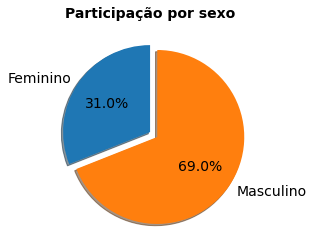

Valores absolutos:


1    276
0    124
Name: masculino, dtype: int64

In [417]:
#Sabemos que sexo é uma variavel importante (conforme pesquisa Fonte), portanto esse 
#desbalanceamento pode ser um problema. Vamos acompanhar ao longo do processo
TOTAL = df_pac.masculino.value_counts()
total_M = TOTAL[0]
total_F = TOTAL[1]

valores = [total_M,total_F]
series = ['Feminino','Masculino']

plt.axis('equal')
plt.rcParams.update({'font.size':14})
plt.rcParams["figure.figsize"] = [5,4]

plt.pie(valores,labels=series,autopct='%1.1f%%',
        explode=(0,0.1),shadow = True,startangle=90,)

plt.title("Participação por sexo",size=14,weight='demibold')
plt.show()

print('Valores absolutos:')
df_pac['masculino'].value_counts()

In [14]:
# Define qual dataset irá utilizar
df_final = df_pac
df_final.head(3)

,id,age,masculino,class_id,volume,massa,soma_endo,soma_epi,soma_parede,edl_endo_1,...,edl_epi_8,edl_par_1,edl_par_2,edl_par_3,edl_par_4,edl_par_5,edl_par_6,edl_par_7,edl_par_8,class_desc
0,id001,29,1,0,74,110,-3.809996e+06,-2.304811e+06,-1.769105e+06,0.0,...,0.0,0.8,0.0,58.5,0.0,52.3,0.0,357.6,0.0,normal
1,id002,31,1,0,94,126,1.973591e+05,1.108307e+05,2.451851e+05,16.1,...,0.0,48.0,0.0,284.0,0.0,0.0,0.0,0.0,0.0,normal
2,id003,27,1,0,92,157,-3.196860e+00,8.881557e+06,-1.306913e+06,33.4,...,0.0,71.4,0.0,177.2,0.0,6.2,0.0,95.2,0.0,normal


# Definição das classes utilizadas dataset

#### Dado que o numero de observações entre "sem cardiomiopatia" e "com cardimiopatia (em caso de soma CDM+CMH") ficaria desbalanceado, optamos por trabalhar com as classes nomal e CMD

In [15]:
#Verifica a quantidade de cada classe
df_final['class_desc'].value_counts()

CMH       183
CMD       116
normal    101
Name: class_desc, dtype: int64

In [16]:
#Determinando quais classes uremos utilizar
df_final_1 = df_final[df_final['class_id']!=1]
df_final_1['class_desc'].value_counts()

CMD       116
normal    101
Name: class_desc, dtype: int64

In [17]:
col_target = df_final_1[['class_id']]
col_target_ = col_target.rename(columns={'class_id':'target'})
col_target_['target'].replace(2,1,inplace=True)
col_target_.head(3)

,target
0,0
1,0
2,0


In [18]:
df_final_1 = pd.concat([df_final_1, col_target_], axis = 1)
df_final_1.head(3)

,id,age,masculino,class_id,volume,massa,soma_endo,soma_epi,soma_parede,edl_endo_1,...,edl_par_1,edl_par_2,edl_par_3,edl_par_4,edl_par_5,edl_par_6,edl_par_7,edl_par_8,class_desc,target
0,id001,29,1,0,74,110,-3.809996e+06,-2.304811e+06,-1.769105e+06,0.0,...,0.8,0.0,58.5,0.0,52.3,0.0,357.6,0.0,normal,0
1,id002,31,1,0,94,126,1.973591e+05,1.108307e+05,2.451851e+05,16.1,...,48.0,0.0,284.0,0.0,0.0,0.0,0.0,0.0,normal,0
2,id003,27,1,0,92,157,-3.196860e+00,8.881557e+06,-1.306913e+06,33.4,...,71.4,0.0,177.2,0.0,6.2,0.0,95.2,0.0,normal,0


### Deleta campos que não vamos utilizar

In [19]:
df_final_3 = df_final_1
df_final_3.head(3)

,id,age,masculino,class_id,volume,massa,soma_endo,soma_epi,soma_parede,edl_endo_1,...,edl_par_1,edl_par_2,edl_par_3,edl_par_4,edl_par_5,edl_par_6,edl_par_7,edl_par_8,class_desc,target
0,id001,29,1,0,74,110,-3.809996e+06,-2.304811e+06,-1.769105e+06,0.0,...,0.8,0.0,58.5,0.0,52.3,0.0,357.6,0.0,normal,0
1,id002,31,1,0,94,126,1.973591e+05,1.108307e+05,2.451851e+05,16.1,...,48.0,0.0,284.0,0.0,0.0,0.0,0.0,0.0,normal,0
2,id003,27,1,0,92,157,-3.196860e+00,8.881557e+06,-1.306913e+06,33.4,...,71.4,0.0,177.2,0.0,6.2,0.0,95.2,0.0,normal,0


In [20]:
df_final_4 = df_final_3.drop(['class_id'],axis = 1)
df_final_4 = df_final_4.drop(['class_desc'],axis = 1)
df_final_4 = df_final_4.drop(['id'],axis = 1)
df_final_4.head(3)

,age,masculino,volume,massa,soma_endo,soma_epi,soma_parede,edl_endo_1,edl_endo_2,edl_endo_3,...,edl_epi_8,edl_par_1,edl_par_2,edl_par_3,edl_par_4,edl_par_5,edl_par_6,edl_par_7,edl_par_8,target
0,29,1,74,110,-3.809996e+06,-2.304811e+06,-1.769105e+06,0.0,0.0,21.6,...,0.0,0.8,0.0,58.5,0.0,52.3,0.0,357.6,0.0,0
1,31,1,94,126,1.973591e+05,1.108307e+05,2.451851e+05,16.1,0.0,133.0,...,0.0,48.0,0.0,284.0,0.0,0.0,0.0,0.0,0.0,0
2,27,1,92,157,-3.196860e+00,8.881557e+06,-1.306913e+06,33.4,0.0,84.4,...,0.0,71.4,0.0,177.2,0.0,6.2,0.0,95.2,0.0,0


In [21]:
#exporta dataset final
df_final_4.to_csv("../RESULTADOS/df_final_16042020.csv", index = False)

# Inicio após exportação

In [22]:
df_final_5 = pd.read_csv("../RESULTADOS/df_final_16042020.csv")
df_final_5.head(3)

,age,masculino,volume,massa,soma_endo,soma_epi,soma_parede,edl_endo_1,edl_endo_2,edl_endo_3,...,edl_epi_8,edl_par_1,edl_par_2,edl_par_3,edl_par_4,edl_par_5,edl_par_6,edl_par_7,edl_par_8,target
0,29,1,74,110,-3.809996e+06,-2.304811e+06,-1.769105e+06,0.0,0.0,21.6,...,0.0,0.8,0.0,58.5,0.0,52.3,0.0,357.6,0.0,0
1,31,1,94,126,1.973591e+05,1.108307e+05,2.451851e+05,16.1,0.0,133.0,...,0.0,48.0,0.0,284.0,0.0,0.0,0.0,0.0,0.0,0
2,27,1,92,157,-3.196860e+00,8.881557e+06,-1.306913e+06,33.4,0.0,84.4,...,0.0,71.4,0.0,177.2,0.0,6.2,0.0,95.2,0.0,0


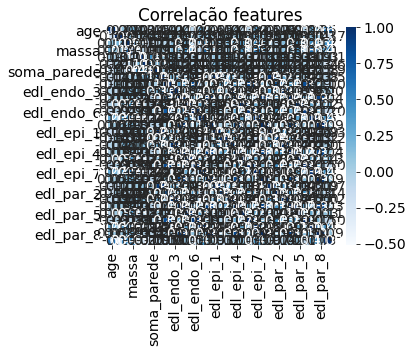

In [418]:
sns.heatmap(df_final_5.corr(), annot = True, fmt = '.2f', cmap='Blues')
plt.title('Correlação features')
plt.show()

In [419]:
#AJUSTA O DATASET QUE IRÁ UTILIZAR PARA FAZER O PCA
pca_1 = df_final_5
pca_1.head(3)

,age,masculino,volume,massa,soma_endo,soma_epi,soma_parede,edl_endo_1,edl_endo_2,edl_endo_3,...,edl_epi_8,edl_par_1,edl_par_2,edl_par_3,edl_par_4,edl_par_5,edl_par_6,edl_par_7,edl_par_8,target
0,29,1,74,110,-3.809996e+06,-2.304811e+06,-1.769105e+06,0.0,0.0,21.6,...,0.0,0.8,0.0,58.5,0.0,52.3,0.0,357.6,0.0,0
1,31,1,94,126,1.973591e+05,1.108307e+05,2.451851e+05,16.1,0.0,133.0,...,0.0,48.0,0.0,284.0,0.0,0.0,0.0,0.0,0.0,0
2,27,1,92,157,-3.196860e+00,8.881557e+06,-1.306913e+06,33.4,0.0,84.4,...,0.0,71.4,0.0,177.2,0.0,6.2,0.0,95.2,0.0,0


# RODANDO PCA

## Alterar parametro "abordagem_x"

In [437]:
# Separando as fetures por abordagem (define features por abordagem e seta o df da abordagem atual)
abordagem_1 = pca_1.columns[0:-1]
abordagem_2 = ['age', 'masculino','volume','massa','soma_endo','soma_epi','soma_parede']

##abordagem 3
df_info_pac =  pca_1.iloc[:,:7]
df_edlpar =  pca_1.iloc[:,23:]
df_abord3 = pd.concat([df_info_pac,df_edlpar],axis=1)
abordagem_3 = df_abord3.columns[0:-1]


## abordagem 4
abordagem_4 = ['age', 'masculino','volume','massa']

#Utiliza a abordagem para selecionar as features
abordagem = abordagem_1
feat = abordagem

colunas = feat
df_atual = pca_1.loc[:, colunas]
df_atual = pd.concat([df_atual,pca_1['target']],axis=1)
df_atual.head(3)

,age,masculino,volume,massa,soma_endo,soma_epi,soma_parede,edl_endo_1,edl_endo_2,edl_endo_3,...,edl_epi_8,edl_par_1,edl_par_2,edl_par_3,edl_par_4,edl_par_5,edl_par_6,edl_par_7,edl_par_8,target
0,29,1,74,110,-3.809996e+06,-2.304811e+06,-1.769105e+06,0.0,0.0,21.6,...,0.0,0.8,0.0,58.5,0.0,52.3,0.0,357.6,0.0,0
1,31,1,94,126,1.973591e+05,1.108307e+05,2.451851e+05,16.1,0.0,133.0,...,0.0,48.0,0.0,284.0,0.0,0.0,0.0,0.0,0.0,0
2,27,1,92,157,-3.196860e+00,8.881557e+06,-1.306913e+06,33.4,0.0,84.4,...,0.0,71.4,0.0,177.2,0.0,6.2,0.0,95.2,0.0,0


,principal component 1,principal component 2,target
0,-2.336672,0.997910,0
1,3.492431,-2.606807,0
2,2.781266,-2.352030,0


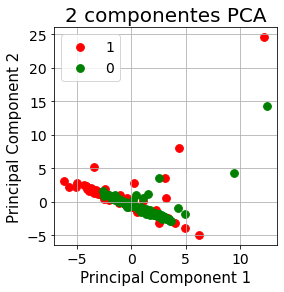

In [438]:
x = pca_1.loc[:, feat].values

# Separa target
y = pca_1.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

#dados normalizados
pca_1_normal = pd.DataFrame(data=x,columns = feat)

pca_1_y =  pd.DataFrame(data=y,columns = ['target'])

#pca_1_normal.tail(3)
#pca_1_y.tail(3)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, pca_1_y], axis = 1)

fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 componentes PCA', fontsize = 20)

targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 60)
ax.legend(targets)
ax.grid()

finalDf.head(3)

In [440]:
total_explicado = pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]
total_explicado

0.41137630905408584

In [537]:
pca.explained_variance_ratio_[1]

0.2440324065436751

## Total informações em 2 componentes principais por abordagem:

### Dataset: EDL + SOMASPHARMS
considerando feat = [todos os atributos] = 41% (No gráfico aparentemente não separa bem)<br />

considerando feat = ['age', 'masculino','volume','massa','soma_endo','soma_epi','soma_parede'] = 50% 
aparentemente separa bem no Gráfico <br />


considerando feat = ['age', 'masculino','volume','massa','soma_endo','soma_epi','soma_parede',EDL_PAREDE] = 34%
aparentemente separa bem no Gráfico <br />

# TESTE SELEÇÃO FEATURE

In [442]:
#Total atributos menos o target
total_atributos = len(df_atual.columns) -1

#Para a seleção utilizaremos noss "D" como a raiz quadrada do nosso total
D_caracteristicas = int(np.sqrt(total_atributos))


print(f'TOTAL CARACTERISTICAS: {total_atributos}')
print(f'CARACTERISTICAS UTILIZADAS NA SELEÇÃO DE FEATURES: {D_caracteristicas}')

TOTAL CARACTERISTICAS: 31
CARACTERISTICAS UTILIZADAS NA SELEÇÃO DE FEATURES: 5


# Select Kbest
## Tipo Filtro

O SelectKBest remove todas as features, exceto os recursos de pontuação mais alta para isso conta com aseleção univariada. Ela funciona selecionando os melhores recursos com base em testes estatísticos univariados. Pode ser visto como uma etapa de pré-processamento para um estimador (tipo filtro).

Seus métodos para classificação são: chi2, f_classif, mutual_info_classif

Os métodos baseados no teste F estimam o grau de dependência linear entre duas variáveis aleatórias. Por outro lado, os métodos de informação mútua podem capturar qualquer tipo de dependência estatística, mas, sendo não paramétricos, exigem mais amostras para uma estimativa 

In [567]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif


#f_classif = SelectKBest(score_func = f_classif,k=D_caracteristicas)
f_classif = SelectKBest(mutual_info_classif,k=D_caracteristicas)



x = df_atual.drop(['target'],axis=1)
y = df_atual['target']


fit = f_classif.fit(x,y)


features = fit.transform(x)
#print(features)


colunas = fit.get_support(indices=True)
df_novo = df_atual.iloc[:,colunas]
df_novo


df_novo_c_target = pd.concat([df_novo,df_atual['target']],axis=1)
df_novo_c_target.head(3)

,age,volume,massa,edl_endo_7,edl_par_7,target
0,29,74,110,168.1,357.6,0
1,31,94,126,0.0,0.0,0
2,27,92,157,44.5,95.2,0


# Features Importances (com RandomForest)
# Tipo camada

Para este caso escolhemos o classificador e selecionamos as caracteristicas manualmente de acordo com a importancia dada pelo classificador em relação à classe alvo.

In [550]:
from sklearn.ensemble import RandomForestClassifier

x = df_atual.drop(['target'],axis=1)
y = df_atual['target']

# Treinando o modelo na base inteira
model  = RandomForestClassifier()
model.fit(x, y)

# Verificando a importância decada feature
#model.feature_importances_


feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

feat_select = feature_importances[feature_importances['importance']>0.05]


feat_select

,importance
age,0.214717
volume,0.118866
massa,0.096531
edl_endo_7,0.057860
edl_par_7,0.057753
soma_epi,0.056635


In [551]:
df_novo_c_target = pd.concat([df_atual.loc[:,feat_select.index],df_atual['target']],axis=1)
df_atual.loc[:,feat_select.index]

,age,volume,massa,edl_endo_7,edl_par_7,soma_epi
0,29,74,110,168.1,357.6,-2.304811e+06
1,31,94,126,0.0,0.0,1.108307e+05
2,27,92,157,44.5,95.2,8.881557e+06
3,52,106,107,131.7,269.3,-1.713535e+05
4,56,68,73,11.7,42.5,-4.095424e+03
...,...,...,...,...,...,...
212,31,97,110,95.6,208.7,-1.342426e+00
213,70,161,298,182.8,361.0,-2.359382e+05
214,48,176,223,78.4,151.6,-5.522654e+05
215,46,261,315,220.8,382.5,-4.021336e+05


# RFE: Recursive feature elimination
## Tipo Camada
A eliminação recursiva de recursos (RFE) seleciona subconjuntos recursivamente, considerando conjuntos cada vez menores de features. Primeiro, o estimador é treinado no conjunto inicial de recursos e a importância de cada feature é obtida por meio de um atributo "coef_" ou através de um atributo "feature_importances_". Em seguida, os recursos menos importantes são removidos do conjunto atual de recursos. Esse procedimento é repetido recursivamente no conjunto removido até que o número desejado de recursos a serem selecionados seja finalmente atingido.

O RFECV executa o RFE em um loop de validação cruzada para encontrar o número ideal de recursos.

In [554]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE



x = df_atual.drop(['target'],axis=1)
y = df_atual['target']

model = LogisticRegression(max_iter=20000)

rfe = RFE(model,D_caracteristicas)

fit = rfe.fit(x,y)


features = fit.get_support(indices=True)


df_novo_c_target = pd.concat([df_atual.iloc[:,features],df_atual['target']],axis=1)
df_atual.iloc[:,features]

,masculino,edl_epi_2,edl_epi_6,edl_par_2,edl_par_6
0,1,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...
212,0,0.0,0.0,0.0,0.0
213,1,0.0,0.0,0.0,0.0
214,0,0.0,0.0,0.0,0.0
215,1,0.0,0.0,0.0,0.0


# Sequential Forward Selection (SFS)
## Tipo: Heurístico
A cada iteração novas
características são adicionadas ao subconjunto
corrente

In [557]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier

#Método de distancia utilizada
knn = KNeighborsClassifier(n_neighbors=30)


x = df_atual.drop(['target'],axis=1)
y = df_atual['target']

sfs1 = SFS(knn, 
           k_features=D_caracteristicas, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(x, y)
sfs1.k_feature_names_
#sfs1.k_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.7s finished

[2020-04-17 01:38:31] Features: 1/5 -- score: 0.8110599078341014[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s finished

[2020-04-17 01:38:32] Features: 2/5 -- score: 0.8433179723502304[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.6s finished

[2020-04-17 01:38:33] Features: 3/5 -- score: 0.8433179723502304[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

('age', 'masculino', 'volume', 'massa', 'edl_endo_1')

In [558]:
df_novo_c_target = pd.concat([df_atual.iloc[:,list(sfs1.k_feature_idx_)],df_atual['target']],axis=1)
df_atual.iloc[:,list(sfs1.k_feature_idx_)]
#df_novo_c_target

,age,masculino,volume,massa,edl_endo_1
0,29,1,74,110,0.0
1,31,1,94,126,16.1
2,27,1,92,157,33.4
3,52,1,106,107,0.0
4,56,1,68,73,2.7
...,...,...,...,...,...
212,31,0,97,110,0.0
213,70,1,161,298,0.0
214,48,0,176,223,13.2
215,46,1,261,315,2.0


# Sequential Backward Selection (SBS)
## Tipo: Heurístico
A cada iteração
características são deletadas do subconjunto
corrente

In [563]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier


#Método de distancia utilizada
knn = KNeighborsClassifier(n_neighbors=10)

x = df_atual.drop(['target'],axis=1)
y = df_atual['target']

# Sequential Backward Selection
sbs = SFS(knn, 
          k_features=D_caracteristicas, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sbs = sbs.fit(x, y)

sbs.k_feature_names_
#sbs.k_score_

('age', 'edl_endo_3', 'edl_endo_7', 'edl_epi_7', 'edl_par_1')

In [564]:
df_novo_c_target = pd.concat([df_atual.iloc[:,list(sbs.k_feature_idx_)],df_atual['target']],axis=1)
df_atual.iloc[:,list(sbs.k_feature_idx_)]

,age,edl_endo_3,edl_endo_7,edl_epi_7,edl_par_1
0,29,21.6,168.1,242.6,0.8
1,31,133.0,0.0,0.0,48.0
2,27,84.4,44.5,67.0,71.4
3,52,17.4,131.7,193.1,0.0
4,56,115.0,11.7,38.6,7.9
...,...,...,...,...,...
212,31,10.0,95.6,151.4,2.4
213,70,83.4,182.8,239.9,0.0
214,48,53.6,78.4,109.7,31.4
215,46,23.6,220.8,239.0,7.4


# Roda PCA APÓS SELEÇÃO


,principal component 1,principal component 2,target
0,-0.010395,0.237503,0
1,-2.483037,0.744429,0
2,-1.662104,0.900456,0


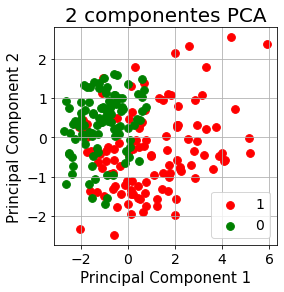

In [568]:
feat = df_novo_c_target.columns[0:-1]
feat

pca_2 = df_novo_c_target
x = pca_2.loc[:, feat].values

# Separa target
y = pca_2.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

#dados normalizados
pca_2_normal = pd.DataFrame(data=x,columns = feat)

pca_2_y =  pd.DataFrame(data=y,columns = ['target'])




pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, pca_2_y], axis = 1)


fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 componentes PCA', fontsize = 20)

targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 60)
ax.legend(targets)
ax.grid()

finalDf.head(3)

In [569]:
total_explicado = pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]
total_explicado

0.7931387483613149

In [400]:
#Caracteristicas selecionadas
df_novo_c_target.head(3)

,age,volume,massa,edl_endo_7,edl_par_7,target
0,29,74,110,168.1,357.6,0
1,31,94,126,0.0,0.0,0
2,27,92,157,44.5,95.2,0


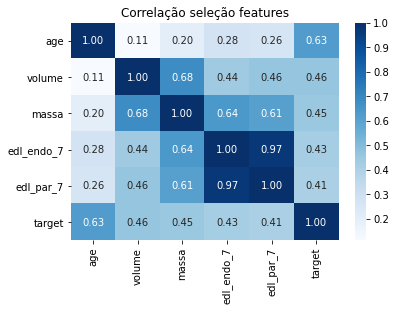

In [401]:
sns.heatmap(df_novo_c_target.corr(), annot = True, fmt = '.2f', cmap='Blues')
plt.title('Correlação seleção features')
plt.show()

In [136]:

#1 abordagem = DATASET COMPLETO

#SelectKBest
#D=5
#f_classif
#79%

#D=5
#mutual_info_classif
#79%

#Randon Forest (11 caracteristicas)
#feature_importances['importance']>0.05]
#69%

#RFE
#LogisticRegression(max_iter=20000)
#79%

#SFS
#KNeighborsClassifier(n_neighbors=30)
#60%


# Sequential Backward Selection (SBS)
#KNeighborsClassifier(n_neighbors=10)
#74%